In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset=pd.read_csv('spam.csv')

In [3]:
dataset.head()

,Label,EmailText
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
dataset.isnull().sum()

Label        0
EmailText    0
dtype: int64

In [5]:
dataset.shape

(5572, 2)

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset.Label=le.fit_transform(dataset.Label)
dataset.Label.shape

(5572,)

In [7]:
dataset.head()

,Label,EmailText
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [9]:
dataset.EmailText[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [10]:
def remove():
    corpus=[]
    for i in range(0,5572):
        text=re.sub('[^a-zA-Z]',' ',dataset.EmailText[i])
        text=text.lower()
        text=text.split()
        text=[ps.stem(word) for word in text if not word in set(stopwords.words('english'))]
        text=' '.join(text)
        corpus.append(text)
    return corpus

In [11]:
corpus=remove()

In [12]:
corpus[0:15]

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

In [13]:
len(corpus)

5572

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=200)
x=cv.fit_transform(corpus).toarray()
y=dataset.Label

In [15]:
x.shape

(5572, 200)

In [16]:
y[0:11]

0     0
1     0
2     1
3     0
4     0
5     1
6     0
7     0
8     1
9     1
10    0
Name: Label, dtype: int32

In [17]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [18]:
ytrain.shape

(4457,)

In [19]:
from keras.utils import np_utils


Using TensorFlow backend.
c:\users\vinod\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\vinod\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\vinod\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16

In [20]:
y_c=np_utils.to_categorical(ytrain)

In [21]:
ytest_c=np_utils.to_categorical(ytest)

In [22]:
ytest

4456    0
690     0
944     0
3768    0
1189    0
       ..
2906    0
1270    0
3944    0
2124    0
253     0
Name: Label, Length: 1115, dtype: int32

In [23]:
ytest_c

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [24]:
xtrain

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [25]:
xtrain.shape

(4457, 200)

In [26]:
for i in range(10):
    print(len(xtrain[i]))

200
200
200
200
200
200
200
200
200
200


In [27]:
ytest[0:11]

4456    0
690     0
944     0
3768    0
1189    0
4437    0
3587    0
1982    0
2038    0
2078    1
4224    0
Name: Label, dtype: int32

## Model

## 1. Logistic 

In [28]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(xtrain,ytrain)

c:\users\vinod\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
ypred=classifier.predict(xtest)
ypred

array([0, 0, 0, ..., 0, 0, 0])

In [30]:
xtest[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypred)

0.9659192825112107

In [32]:
def check():
    y1=[]
    for i in range(0,5):
        y1.append(ypred[i].tolist())
        print(corpus[i])
        if y1[i]==1:
            print('spam')
        else:
            print('ham')

In [33]:
check()

go jurong point crazi avail bugi n great world la e buffet cine got amor wat
ham
ok lar joke wif u oni
ham
free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli
ham
u dun say earli hor u c alreadi say
ham
nah think goe usf live around though
ham


## 2. Decision tree

In [34]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
classifier.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [35]:
ypred=classifier.predict(xtest)

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypred)

0.9713004484304932

## Neutral Network

In [208]:
from keras.models import Sequential
from keras.layers import Dense
model= Sequential()

In [209]:
model.add(Dense(128,activation = 'relu', input_dim = 200))

# Adding the second hidden layer
model.add(Dense(32,activation = 'relu'))
model.add(Dense(16,activation = 'relu'))

# Adding the output layer
model.add(Dense(2,activation = 'softmax'))

In [210]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_80 (Dense)             (None, 128)               25728     
_________________________________________________________________
dense_81 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_82 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_83 (Dense)             (None, 2)                 34        
Total params: 30,418
Trainable params: 30,418
Non-trainable params: 0
_________________________________________________________________


In [211]:
from keras.optimizers import Adam
adam=Adam(lr=1e-3)

In [212]:
model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [217]:
fit=model.fit(xtrain, y_c ,batch_size = 16, epochs = 50,validation_data=(xtest,ytest_c))

Train on 4457 samples, validate on 1115 samples
Epoch 1/50
4457/4457 [==============================] - 1s 230us/step - loss: 0.0111 - acc: 0.9973 - val_loss: 0.1941 - val_acc: 0.9794
Epoch 2/50
4457/4457 [==============================] - 1s 232us/step - loss: 0.0114 - acc: 0.9971 - val_loss: 0.2850 - val_acc: 0.9731
Epoch 3/50
4457/4457 [==============================] - 1s 265us/step - loss: 0.0150 - acc: 0.9960 - val_loss: 0.2397 - val_acc: 0.9785
Epoch 4/50
4457/4457 [==============================] - 1s 248us/step - loss: 0.0179 - acc: 0.9962 - val_loss: 0.2070 - val_acc: 0.9785
Epoch 5/50
4457/4457 [==============================] - 1s 265us/step - loss: 0.0106 - acc: 0.9973 - val_loss: 0.2227 - val_acc: 0.9776
Epoch 6/50
4457/4457 [==============================] - 2s 382us/step - loss: 0.0106 - acc: 0.9973 - val_loss: 0.2173 - val_acc: 0.9776
Epoch 7/50
4457/4457 [==============================] - 2s 479us/step - loss: 0.0105 - acc: 0.9973 - val_loss: 0.2203 - val_acc: 0.9776


In [218]:
import matplotlib.pyplot as plt

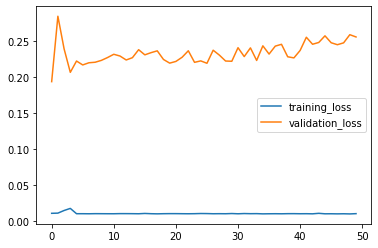

In [219]:
plt.plot(fit.history['loss'],label='training_loss')
plt.plot(fit.history['val_loss'],label='validation_loss')
plt.legend()
plt.show()

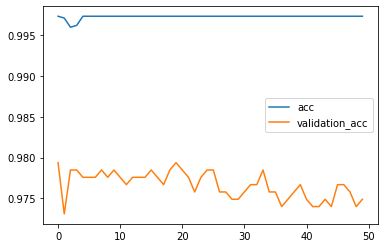

In [220]:
plt.plot(fit.history['acc'],label='acc')
plt.plot(fit.history['val_acc'],label='validation_acc')
plt.legend()
plt.show()

In [221]:
#ypred=model.predict(test)